# Problem Set 9

## Problem 1

For the equation $\ddot{x} + \mu (x^2 + \dot{x}^2 - 1) \dot{x} + x = 0$, where $\mu > 0$:  

**(a)** Find and classify all the fixed points.  

**(b)** Show that the system has a circular limit cycle and find its amplitude and period.  

**(c)** Determine the stability of the limit cycle. Give an argument which shows that the limit cycle is unique, i.e., there are no other periodic trajectories.

### Solution

Let's rewrite the equation as follows:

$$
\begin{cases}
\dot{x} = y\\
\dot{y} = \mu (1 - x^2 - y^2)y - x
\end{cases}
$$

The fixed points are:

$$
\begin{cases}
y = 0,\\
\mu(1 - x^2 - y^2)y - x = 0
\end{cases} 
=
\begin{cases}
y = 0\\
x = 0
\end{cases}
$$

So, out fixed point is:

$$
p_0 = (0, 0)
$$

Next, we perform linearization:

$$
J =
\begin{bmatrix}
0 & 1\\
-2 \mu xy - 1 & -\mu(x^2 + 3y^2 -1)
\end{bmatrix}
$$

Substituting the fixed point into the Jacobian:

$$
J|_{(0, 0)} = 
\begin{bmatrix}
0 & 1\\
-1 & \mu
\end{bmatrix}
$$

#### (a)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y, mu = sp.symbols('x, y, mu')

J = sp.Matrix([
    [0, 1],
    [-1, mu]
])

J.eigenvects()

[(mu/2 - sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 + sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])]),
 (mu/2 + sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 - sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])])]

Eigenvalues and eigenvectors of the matrix $J|_{(0, 0)}$ are:

$$
\lambda_{1, 2} = \frac{(\mu \pm \sqrt{\mu ^2 - 4})}{2},\\
{}\\
s_{1, 2} = \begin{bmatrix}1 \\ \frac{(\mu \pm \sqrt{\mu ^2 - 4})}{2}\end{bmatrix}
$$


Now let's elaborate on different $\mu$:

1. $\mu < 2$, then $\lambda_{1, 2}$ are complex conjugate - the fixed point will be the unstable spiral, since $Re(\lambda_{i}) > 0$.
2. $\mu = 2$, then $\lambda_{1} = \lambda_{2} \in \mathbb{R}$, also $s_1 = s_2$, this is a degenerate node.
3. $\mu > 2$, then $\lambda_{1} > \lambda_{2} > 0$, this yields an unstable node.

Let's plot the phase portrait around the fixed point for different $\lambda$'s:

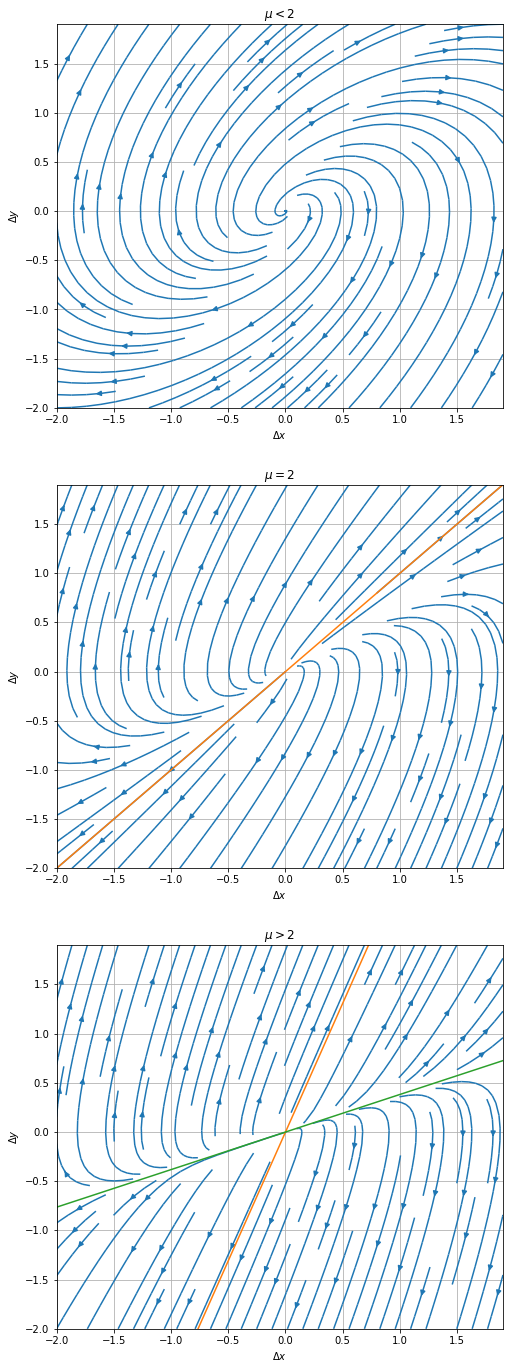

In [3]:
J1 = np.array([
    [0, 1],
    [-1, 1]
])
J2 = np.array([
    [0, 1],
    [-1, 2]
])
J3 = np.array([
    [0, 1],
    [-1, 3]
])

s2 = np.array([1, 1])
s31 = np.array([2, 3 + np.sqrt(9 - 4)])/2
s32 = np.array([2, 3 - np.sqrt(9 - 4)])/2

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U1 = np.zeros(X.shape)
V1 = np.zeros(X.shape)
U2 = np.zeros(X.shape)
V2 = np.zeros(X.shape)
U3 = np.zeros(X.shape)
V3 = np.zeros(X.shape)

for i in range(ni):
    for j in range(nj):
        U1[i][j], V1[i][j] = J1.dot(np.array([X[i][j], Y[i][j]]))
        U2[i][j], V2[i][j] = J2.dot(np.array([X[i][j], Y[i][j]]))
        U3[i][j], V3[i][j] = J3.dot(np.array([X[i][j], Y[i][j]]))

plt.subplot(311)
plt.streamplot(X, Y, U1, V1)
plt.title('$\mu < 2$')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.ylim((-2, 1.9))
plt.grid()
plt.subplot(312)
plt.streamplot(X, Y, U2, V2)
plt.title('$\mu = 2$')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.plot([-2, 2], s2[1]*[-2, 2])
plt.xlim((-2, 1.9))
plt.ylim((-2, 1.9))
plt.grid()
plt.subplot(313)
plt.streamplot(X, Y, U3, V3)
plt.title('$\mu > 2$')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.plot([-2, 2], s31[1]*np.array([-2, 2]))
plt.plot([-2, 2], s32[1]*np.array([-2, 2]))
plt.xlim((-2, 1.9))
plt.ylim((-2, 1.9))
plt.grid()
plt.gcf().set_size_inches(8, 24)


#### (b)

To obtain the limit cycle we move to polar coordinates:

$$
\begin{cases}
x = r\cos{\varphi}\\
y =  r\sin{\varphi}
\end{cases}
, \hspace{3mm}
\begin{cases}
\dot{x} = \dot{r}\cos{\varphi} - r\dot{\varphi}\sin{\varphi}\\
\dot{y} = \dot{r}\sin{\varphi} + r\dot{\varphi}\cos{\varphi}
\end{cases}
$$

and the system is rewritten as follows:

$$
\begin{cases}
\dot{r}\cos{\varphi} - r\dot{\varphi}\sin{\varphi} = \sin{\varphi}\\
\dot{r}\sin{\varphi} + r\dot{\varphi}\cos{\varphi} = \mu(1 - r^2\cos^2{\varphi} - r^2\sin^2{\varphi}) r\sin{\varphi} - r\cos{\varphi}
\end{cases}
$$


See the attached image:

```{image} ../attachments/PS9/ps9p1_1.jpg
:alt: Problem 1
:width: 320px
:align: center
```

Now let's build the full phase portrait:

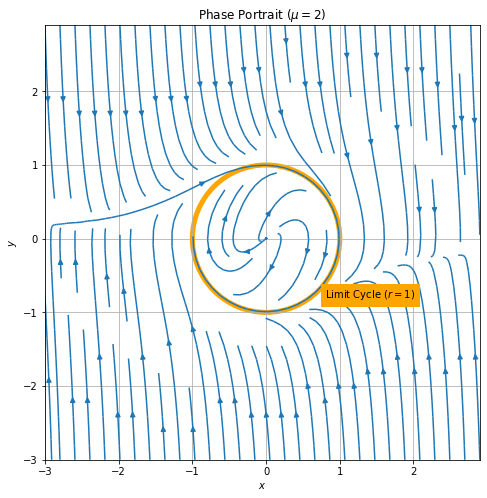

In [4]:
def dx(x, y):
    return y

def dy(x, y):
    return -mu*(x**2 + y**2 - 1)*y - x

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

X, Y = np.meshgrid(x, y)

ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

mu = 2

for i in range(ni):
  for j in range(nj):
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])

plt.streamplot(X, Y, U, V)
ax = plt.gca()
ax.axis('square')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Phase Portrait ($\mu = 2$)')
ax.add_patch(plt.Circle((0, 0), 1, fill=None, edgecolor='orange', alpha=1, visible=True, lw=5))
plt.gcf().set_size_inches(8, 8)
tmp = plt.text(0.8, -0.8, s="Limit Cycle ($r = 1$)", backgroundcolor='orange')


#### (c)

The limit cycle is unique as there is only one condition that satisfied $\dot{r} = 0$, that is $r = \pm 1 = 1, \hspace{1mm} r > 0$.

The cycle is stable, see the attached image:

```{image} ../attachments/PS9/ps9p1_2.jpg
:alt: Problem 1
:width: 320px
:align: center
```

As we see, all deviations from the stable cycle tend to be eliminated as the $\dot{r}$ changes its sign contrary to the sign of the deviation. That is, $\frac{dr}{dt}$ is strictly positive when $r < 1$ and stricly negative when $r > 1$. Thus, this is analogous to a global minima of some function, for example, $(r-1)^2$. That also proves the uniqueness of the cycle.

## Problem 2

Investigate the phase plane of the system $\dot{x} = y, \hspace{3mm} \dot{y} = x(\mu - x^2)$, for $\mu < 0$, $\mu = 0$, and $\mu > 0$. Describe the bifurcation as $\mu$ increases through zero.

### Solution

Fixed points:

$$
\begin{cases}
y = 0\\
x(\mu - x^2) = 0
\end{cases}
$$

From here we derive:

$$
\begin{align*}
&p_1 = (0, 0)\\
&p_{2, 3} = (0, \pm \sqrt{\mu}), \hspace{3mm} \mu \geq 0
\end{align*}
$$


Linearization:

$$
\begin{bmatrix}
0 & 1\\
\mu - 3x^2 & 0
\end{bmatrix}
$$

Let's investigate on $\mu$ with different signs:

1. $\mu > 0$, then $p_{2,3} = (0, \pm \sqrt{\mu})$ and

$$
J|_{p_1} = 
\begin{bmatrix}
0 & 1\\
\mu & 0
\end{bmatrix},
\hspace{3mm}
J|_{p_{2,3}} = 
\begin{bmatrix}
0 & 1\\
-2\mu & 0
\end{bmatrix}
$$

In this case there are $3$ different fixed points. Let's determine their characteristics:

In [5]:
x, mu = sp.symbols('x, mu')

In [6]:
subs1 = {mu - 3*x**2: mu}

J1 = J.subs(subs1)

J1.eigenvects()

[(mu/2 - sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 + sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])]),
 (mu/2 + sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 - sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])])]

\

In [7]:
subs2 = {mu - 3*x**2: -2*mu}

J2 = J.subs(subs2)

J2.eigenvects()

[(mu/2 - sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 + sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])]),
 (mu/2 + sqrt((mu - 2)*(mu + 2))/2,
  1,
  [Matrix([
   [mu/2 - sqrt((mu - 2)*(mu + 2))/2],
   [                               1]])])]

For the point $p_1$ we get $\lambda_1 = - \lambda_2$ and this is a saddle. For the points $p_{2, 3}$ we obtain $\lambda_1 = \lambda_2^*$, complex conjugate eigenvalues, these are centers.

Let's plot the phase portraits for $\mu = 1$:

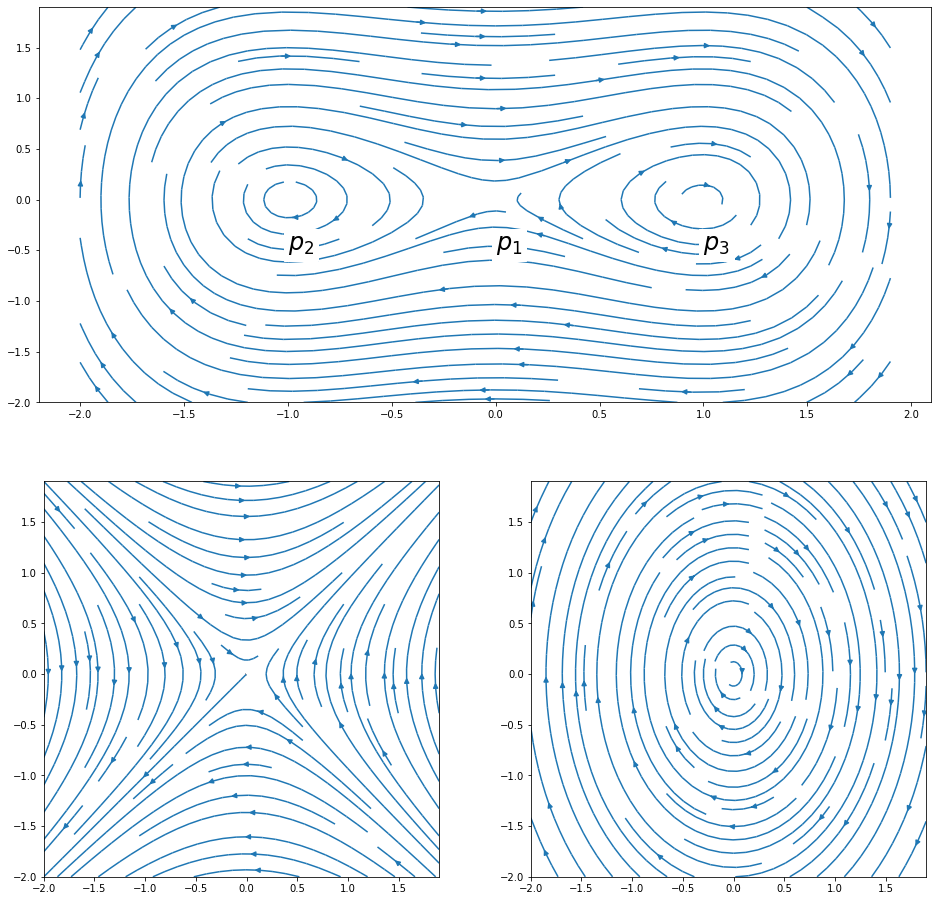

In [8]:
mu = 1

def dx(x, y):
    return y

def dy(x, y):
    return x * (mu - x**2)

J1 = np.array([
    [0, 1],
    [1, 0]
])

J2 = np.array([
    [0, 1],
    [-2, 0]
])

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

U1 = np.zeros(X.shape)
V1 = np.zeros(X.shape)

U2 = np.zeros(X.shape)
V2 = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    arr = np.array([X[i][j], Y[i][j]])
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])
    U1[i][j], V1[i][j] = J1.dot(arr)
    U2[i][j], V2[i][j] = J2.dot(arr)


plt.subplot(211)
plt.streamplot(X, Y, U, V)
plt.text(-1, -0.5, s='$p_2$', fontsize=24, backgroundcolor='white')
plt.text(1, -0.5, s='$p_3$', fontsize=24, backgroundcolor='white')
plt.text(0, -0.5, s='$p_1$', fontsize=24, backgroundcolor='white')
plt.subplot(223)
plt.streamplot(X, Y, U1, V1)
plt.gca().axis('square')
plt.subplot(224)
plt.streamplot(X, Y, U2, V2)
plt.gca().axis('square')
plt.gcf().set_size_inches(16,16)

As an act of empiric thinking we may predict what will happen when we decrease $\mu$ to zero: $\pm \sqrt{\mu}$ defines the coordinates of the fixed points $p_{2, 3}$ on the $X$ axis. Gradually decreasing $\mu$ will lead to the fixed points collapsing into single point at $(0, 0)$. Let's observe that: 

2. $\mu = 0$, then $p = (0, 0)$. Let's determine the type of the fixed point:

$$
J|_{p} = 
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
$$

$\lambda_1 = \lambda_2 = 0$ - this is a degenerate node by linearization. Let's plot both linearized around the $p$ and general phase portraits:

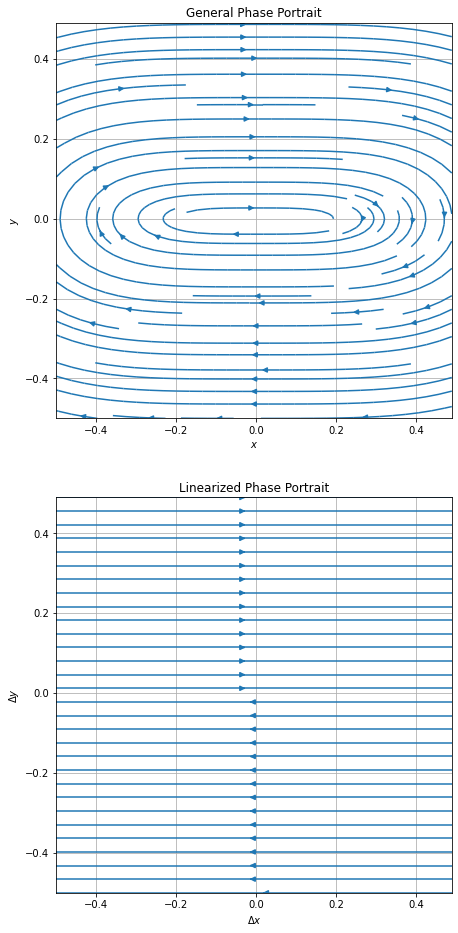

In [9]:
mu = 0

J21 = np.array([
    [0, 1],
    [0, 0]
])

x = np.arange(-0.5, 0.5, 0.01)
y = np.arange(-0.5, 0.5, 0.01)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

U1 = np.zeros(X.shape)
V1 = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    arr = np.array([X[i][j], Y[i][j]])
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])
    U1[i][j], V1[i][j] = J21.dot(arr)

plt.subplot(211)
plt.streamplot(X, Y, U, V)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('General Phase Portrait')
plt.grid()
plt.gca().axis('square')
plt.xlim((-0.5, 0.49))
plt.ylim((-0.5, 0.49))
plt.subplot(212)
plt.streamplot(X, Y, U1, V1)
plt.xlabel('$\\Delta x$')
plt.ylabel('$\\Delta y$')
plt.title('Linearized Phase Portrait')
plt.grid()
plt.gca().axis('square')
plt.xlim((-0.5, 0.49))
plt.ylim((-0.5, 0.49))
plt.gcf().set_size_inches(8, 16)

We see that indeed the fixed point with $\mu = 0$ becomes a degenerate node.

3. $\mu < 0$, then $p = (0, 0)$ as $x$ and $y \in \mathbb{R}$, but the solutions change:

$$
J|_{p} = 
\begin{bmatrix}
0 & 1\\
\mu & 0
\end{bmatrix}
$$

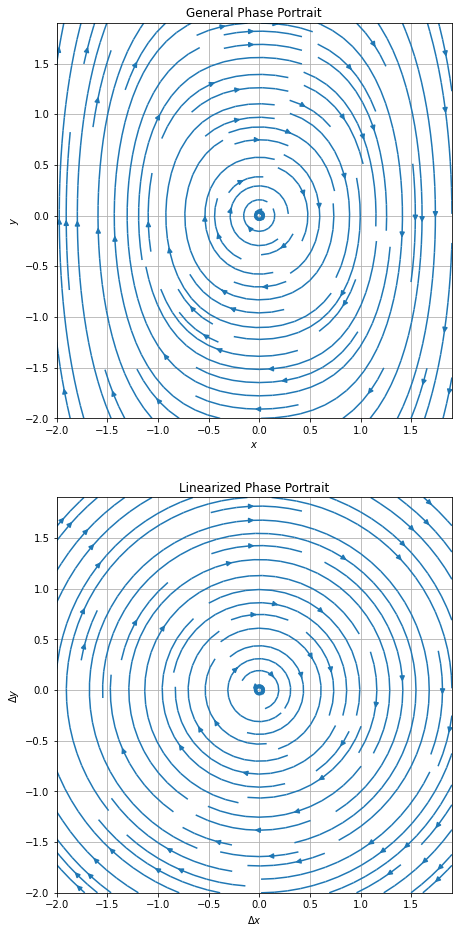

In [10]:
mu = -1

J22 = np.array([
    [0, 1],
    [mu, 0]
])

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

U1 = np.zeros(X.shape)
V1 = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    arr = np.array([X[i][j], Y[i][j]])
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])
    U1[i][j], V1[i][j] = J22.dot(arr)

plt.subplot(211)
plt.streamplot(X, Y, U, V)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('General Phase Portrait')
plt.grid()
plt.gca().axis('square')
plt.xlim((-2, 1.9))
plt.ylim((-2, 1.9))
plt.subplot(212)
plt.streamplot(X, Y, U1, V1)
plt.xlabel('$\\Delta x$')
plt.ylabel('$\\Delta y$')
plt.title('Linearized Phase Portrait')
plt.grid()
plt.gca().axis('square')
plt.xlim((-2, 1.9))
plt.ylim((-2, 1.9))
plt.gcf().set_size_inches(8, 16)

In [11]:
mu = sp.symbols('mu')

JJJ = sp.Matrix([
    [0, 1],
    [mu, 0]
])

JJJ.eigenvects()

[(-sqrt(mu),
  1,
  [Matrix([
   [-1/sqrt(mu)],
   [          1]])]),
 (sqrt(mu),
  1,
  [Matrix([
   [1/sqrt(mu)],
   [         1]])])]

$\lambda$'s are complex conjugate, this is a center.

#### And thems the facts:

As $\mu$ approaches zero, the fixed points (two different centers and central saddle) collapse, transitioning through a degenerate node at $\mu = 0$ and transforming to center fixed point at $\mu < 0$. The bifurcation occurs at $\mu = 0$.

## Problem 3

Consider the equation $\ddot{x} + \mu f(x)\dot{x} + x = 0$, where $f = -1$ for $|x| < 1$ and $f = 1$ for $|x| \geq 1$.

**(a)** Show the system is equivalent to $\dot{x} = \mu(y - F(x))$, $\dot{y} = -x/\mu$ where

$$
F = 
\begin{cases}
x + 2, \hspace{3mm} x \leq -1\\
-x, \hspace{3mm} |x| < 1\\
x - 2, \hspace{3mm} x \geq 1.
\end{cases}
$$

**(b)** Graph the nullclines. 

**(c)** Show that the sytem exhibits relaxation oscillations for $\mu \geq 1$, and plot the limit cycle in the $(x, y)$ plane.  

**(d)** Estimate the period of the limit cycle for $\mu \gg 1$.

### Solution

#### (a)

```{image} ../attachments/PS9/ps9p3.jpg
:alt: Problem 3
:width: 320px
:align: center
```

#### (b)

The nullclines are:

$$
\begin{cases}
\dot{x} = 0 = \mu(y - F(x))\\
\dot{y} = 0 = -\frac{x}{\mu}
\end{cases}
=
\begin{cases}
y = F(x)\\
x = 0
\end{cases}
$$


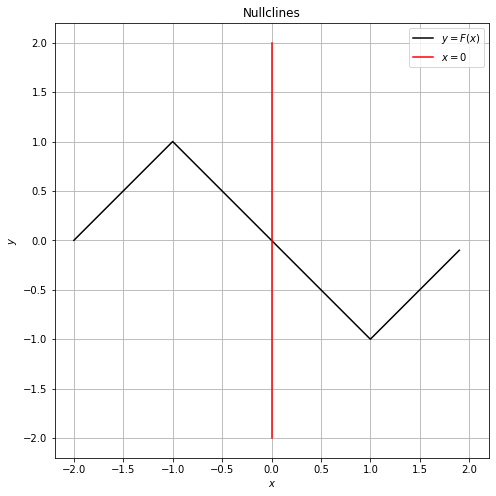

In [12]:
def F(x):
    if (x <= -1):
        return x + 2
    elif (-1 < x < 1):
        return -x
    elif (1 <= x):
        return x - 2
    else:
        print('Error')
        return 0

x = np.arange(-2, 2, 0.1)
y = np.array([F(x_) for x_ in x])

nc1 = plt.plot(x, y, color='black', label='$y = F(x)$')
nc2 = plt.plot([0, 0], [-2, 2], color='red', label='$x = 0$')
plt.grid()
plt.gcf().set_size_inches(8, 8)
plt.gca().axis('square')
plt.legend()
plt.title('Nullclines')
plt.xlabel('$x$')
tmp = plt.ylabel('$y$')


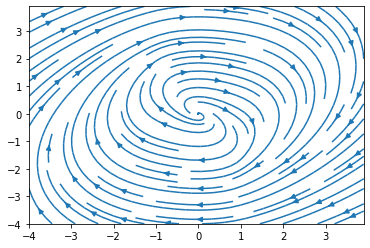

In [13]:
mu = 1
def dx(x, y):
  return mu * (y - F(x))
def dy(x, y):
  return -x / mu

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])

plt.streamplot(X, Y, U, V)

#### (c)

To see that the system exhibits relaxation let's look at the original equation:

$$
\ddot{x} + \mu f(x) \dot{x} + x = 0
$$

and take into account the form of the function $f(x)$. The term $\mu f(x)$ represents damping, and it is negative (e.g. increasing the signal) for $|x| < 1$, as $f(x) = -1, \hspace{1mm} |x| < 1$ and positive otherwise. Thus, the system will approach some sustained oscillation.

To find the limit cycle, we have to numerically integrate the equation. We'll start with $t_0 = 0, \hspace{1mm} (x_0, y_0) = (1, 1)$:

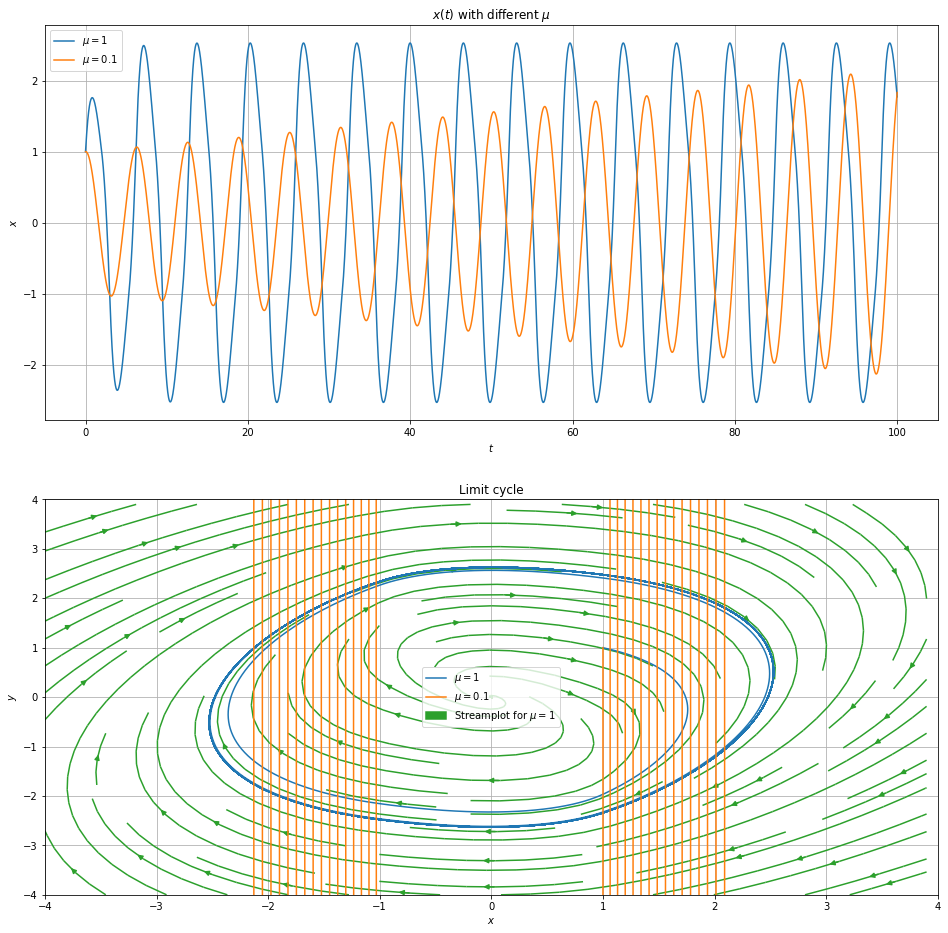

In [14]:
interval = np.arange(0, 100, 0.01)
z = np.zeros(interval.shape)
v = np.zeros(interval.shape)
z0 = 1
v0 = 1
z[0] = z0
v[0] = v0

mu = 1

for i in range(len(z)-1):
    z[i+1] = z[i] + (interval[i+1] - interval[i])*dx(z[i], v[i])
    v[i+1] = v[i] + (interval[i+1] - interval[i])*dy(z[i], v[i])

plt.subplot(211)
plt.plot(interval, z, label='$\mu = 1$')
plt.grid()
plt.title('$x(t)$ with different $\mu$')
plt.xlabel('$t$')
plt.ylabel('$x$')

plt.subplot(212)
plt.plot(z, v, label='$\mu = 1$')
plt.grid()
plt.title('Limit cycle')
plt.xlabel('$x$')
plt.ylabel('$y$')

mu = 0.01

for i in range(len(z)-1):
    z[i+1] = z[i] + (interval[i+1] - interval[i])*dx(z[i], v[i])
    v[i+1] = v[i] + (interval[i+1] - interval[i])*dy(z[i], v[i])

plt.subplot(211)
plt.plot(interval, z, label='$\mu = 0.1$')
plt.legend()

plt.subplot(212)
plt.plot(z, v, label='$\mu = 0.1$')
plt.streamplot(X, Y, U, V)
#plt.gca().axis('square')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.legend(('$\mu = 1$', '$\mu = 0.1$', 'Streamplot for $\mu = 1$'))

plt.gcf().set_size_inches(16, 16)

## Problem 4

Consider the system:

$$
\dot{x} = -y + \mu x + xy^2, \hspace{3mm} \dot{y} = x + \mu y - x^2.
$$

**(a)** Linearize about the origin and determine the type of the fixed point.

**(b)** Write down the system to find all the fixed points. Eliminate $y$ to find the equation for $x_c(\mu)$. Make a plot of this function to find out how many fixed points there are for given $\mu$.

**(c)** Investigate numerically the nature of the solutions on a phase plane as $\mu$ varies about $\mu = 0$.

**(d)** What is the type of the bifurcation that takes place as $\mu$ crosses $0$?

**(e)** Rewrite the system in the polar coordinates $x = r\cos\upsilon, \hspace{1mm} y = r\sin\upsilon$ and approximate the system assuming $r$ small. Show that to leading order the system becomes

$$
\dot{r} = \mu r + \frac{1}{8}r^3, \hspace{3mm} \dot{\Theta} = 1,
$$

and hence one can expect a limit cycle of radius $r \approx \sqrt{-8\mu}$ when $\mu < 0$. Confirm this numerically.

### Solution

#### (a)

Linearization:

$$
J =
\begin{bmatrix}
\mu + y^2 & -1 + 2xy\\
1 - 2x & \mu
\end{bmatrix}
$$

Fixed points:

$$
\begin{cases}
-y + \mu x + xy^2 = 0\\
x + \mu y - x^2 = 0
\end{cases}
$$

$p = (0, 0)$ satisfies the condition.

$$
J|_{p} = 
\begin{bmatrix}
\mu & -1\\
1 & \mu
\end{bmatrix}
$$

In [15]:
mu = sp.symbols('mu')

J = sp.Matrix([
    [mu, -1],
    [1, mu]
])

J.eigenvects()

[(mu - I,
  1,
  [Matrix([
   [-I],
   [ 1]])]),
 (mu + I,
  1,
  [Matrix([
   [I],
   [1]])])]

The eigenvalues are complex conjugate with $Re(\lambda_i) \neq 0$, hence, this is a spiral.

#### (b)

For $\mu \neq 0$:

```{image} ../attachments/PS9/ps9p4.jpg
:alt: Problem 3
:width: 320px
:align: center
```

```{warning}
$\mu ^3$ instead of $\mu^2$ at the term $x$
```

$$
x^5 - 2x^4 + x^3 - \mu x^2 + \mu(\mu ^2 + 1)x = 0
$$

For $\mu = 0$ we can directly find the fixed points:

$$
\begin{cases}
-y + xy^2 = 0\\
x - x^2 = 0
\end{cases}
=
\begin{cases}
y = xy^2\\
x(x-1) = 0
\end{cases}
$$

From here follows that

$$
\begin{align*}
& p_1 = (0, 0)\\
& p_2 = (1, 0)\\
& p_3 = (1, 1)
\end{align*}
$$



Let's plot the function for $x_c(\mu)$ when $\mu \neq 0$ and search for solutions other than $x = 0$, as we already know that $(0, 0)$ is a fixed point $\forall \mu$. For that we can split the equation into two parts and search for the intersection points:

$$
x^4 = 2x^3 - x^2 + \mu x - \mu (\mu + 1)
$$

```{warning}
This did no good
```

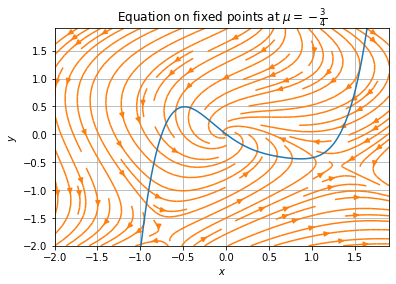

In [16]:
x = np.arange(-3, 3, 0.01)
m = -0.75
def part1(x):
    return x**4

def part2(x):
    return 2*x**3 - x**2 + m*x - m*(m+1)

def xx(x):
    return x**5 - 2*x**4 + x**3 - m*x**2 + m*(m**2 + 1)*x

y = xx(x)

plt.plot(x, y)

plt.ylim((-2, 1.9))
plt.xlim((-2, 1.9))
plt.grid()

def dx(x, y):
  return -y + m*x + x*y**2
def dy(x, y):
  return x + m*y - x**2

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])

plt.streamplot(X, Y, U, V)
plt.title('Equation on fixed points at $\\mu = -\\frac{3}{4}$')
plt.xlabel('$x$')
tmp = plt.ylabel('$y$')

We can clearly see that fixed points appear at coordinate $x$ where the function crosses $0$. The $y$ coordinate can be derived substituting the $x$ coordinate into the system for fixed points.

#### (c), (d)

The eigenvalues are $\mu \pm i$, thus, when $\mu$ crosses $0$, the fixed point undergoes a transition from an unstable spiral ($\mu > 0$) to a center ($\mu = 0$) and to a stable spiral ($\mu < 0$). The eigenvalues cross the imaginary axis on a complex plane. This is a Hopf bifurcation. From the point **(b)** we see thatwe have a stable limit cycle with $\mu > 0$, thus, it is supercritical.

#### (e)


```{image} ../attachments/PS9/ps9p4_1.jpg
:alt: Problem 3
:width: 320px
:align: center
```

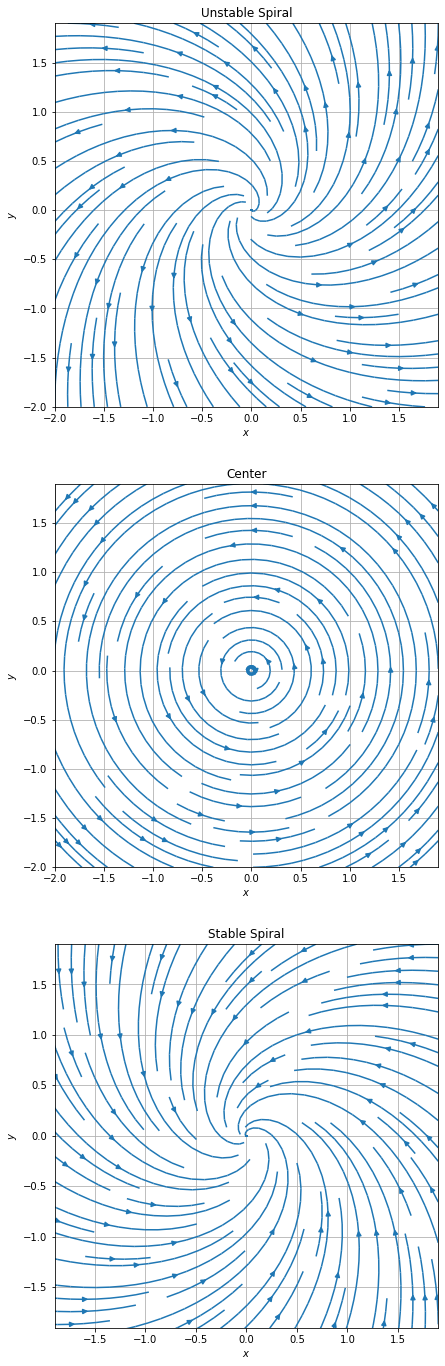

In [17]:
J1 = np.array([
    [1, -1],
    [1, 1]
])
J2 = np.array([
    [0, -1],
    [1, 0]
])
J3 = np.array([
    [-1, -1],
    [1, -1]
])

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U1 = np.zeros(X.shape)
V1 = np.zeros(X.shape)
U2 = np.zeros(X.shape)
V2 = np.zeros(X.shape)
U3 = np.zeros(X.shape)
V3 = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    arr = np.array([X[i][j], Y[i][j]])
    U1[i][j], V1[i][j] = J1.dot(arr)
    U2[i][j], V2[i][j] = J2.dot(arr)
    U3[i][j], V3[i][j] = J3.dot(arr)

    
plt.subplot(311)
plt.streamplot(X, Y, U1, V1)
plt.gca().axis('square')
plt.title('Unstable Spiral')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.xlim((-2, 1.9))
plt.ylim((-2, 1.9))
plt.subplot(312)
plt.streamplot(X, Y, U2, V2)
plt.gca().axis('square')
plt.title('Center')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.subplot(313)
plt.streamplot(X, Y, U3, V3)
plt.gca().axis('square')
plt.title('Stable Spiral')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.xlim((-1.9, 1.9))
plt.ylim((-1.9, 1.9))
plt.gcf().set_size_inches(8, 24)

#### (d)


## Problem 5

Consider the system:

$$
\dot{x} = y, \hspace{3mm} \dot{y} = x^2 - y - \mu.
$$

**(a)** Analyze the fixed points of the system at all possible $\mu$.

**(b)** What type of bifurcation takes plase as $\mu$ crosses $0$?

**(c)** Draw the bifurcation diagram in the space of $x_c$ vs $\mu$, where $x_c$ is the critical point.

**(d)** Plot the phase plane at $\mu = 0.01$.

### Solution

#### (a)

Fixed points:

$$
\begin{cases}
y = 0\\
x^2 - y - \mu = 0
\end{cases}
=
\begin{cases}
y = 0\\
x^2 = \mu
\end{cases}
$$

This yields the following fixed points:

$$
\begin{align*}
& p_{1, 2} = (0, \pm \sqrt{\mu}), \hspace{3mm} \mu > 0\\
& p_3 = (0, 0), \hspace{3mm} \mu = 0\\
& p_4 = \empty, \hspace{3mm} \mu < 0
\end{align*}
$$

Linearization:

$$
J = 
\begin{bmatrix}
0 & 1\\
2x_f & -1
\end{bmatrix}
$$

Eigenvalues:

$$
\lambda_{1, 2} = \frac{1}{2}( \pm \sqrt{8x_f + 1} - 1)
$$

For $\mu > 0$, $x_f = \pm \mu$, and there are two fixed points. Let's discuss them separately:

1. $x_f = \sqrt{\mu}$, then $\lambda_{1, 2} = \frac{1}{2} (\pm \sqrt{8 \sqrt{\mu} + 1} - 1)$. The undersquare expression is strictly $>0$, thus, we have two lambdas of different sign - this is a saddle.

2. $x_f = - \sqrt{\mu}$, then $\lambda_{1, 2} = \frac{1}{2} (\pm \sqrt{1 - 8 \sqrt{\mu}} - 1)$. There are three cases:
   
$$
\begin{cases}
\sqrt{\mu} = \frac{1}{8}, \hspace{3mm} \lambda_1 = \lambda_2 = -1 \hspace{3mm} (1)\\
\sqrt{\mu} < \frac{1}{8}, \hspace{3mm} \lambda_2 < \lambda_1 < 0 \hspace{3mm} (2)\\
\sqrt{\mu} > \frac{1}{8}, \hspace{3mm} \lambda_1 = \lambda_2^* \hspace{3mm} (3)
\end{cases}
$$

$(1)$ - degenerate node, $(2)$ - stable node, $(3)$ - stable spiral.

For $\mu = 0$, there is only one fixed point $(0, 0)$, and it yields $\lambda_1 = -1$, $\lambda_2 = 0$. This is a saddle.

For $\mu < 0$, there are no fixed points $\Rightarrow$ bifurcation occurs there.

#### (d)

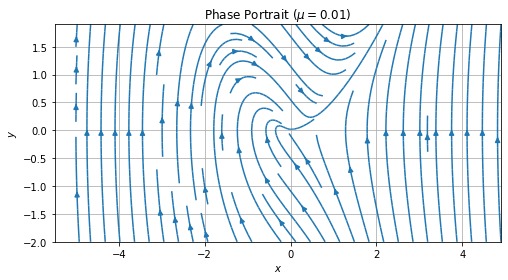

In [18]:
mu = -0.01

def dx(x, y):
  return y
def dy(x, y):
  return x**2 - y - mu

x = np.arange(-5, 5, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

for i in range(ni):
  for j in range(nj):
    U[i][j] = dx(X[i][j], Y[i][j])
    V[i][j] = dy(X[i][j], Y[i][j])

plt.streamplot(X, Y, U, V)
plt.title('Phase Portrait ($\\mu = 0.01$)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.gcf().set_size_inches(8, 4)

#### (c)

With transition of $\mu$ through $0$ the Jacobian experiences zero eigenvalue, thus, $\mu = 0$ is a steady state saddle-node bifurcation point.

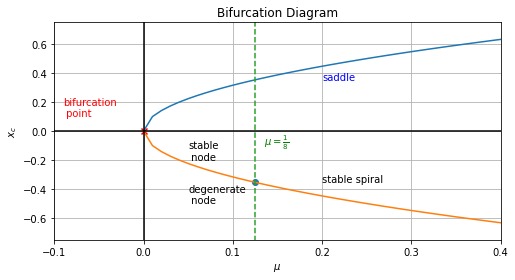

In [19]:
mu = np.arange(0, 0.41, 0.01)
x1 = np.sqrt(mu)
x2 = -np.sqrt(mu)

plt.plot(mu, x1)
plt.plot(mu, x2)

plt.plot([-1, 4], [0, 0], color='black')
plt.plot([0, 0], [-3, 3], color='black')
plt.plot([1/8, 1/8], [-3, 3], linestyle='--')
plt.xlim((-0.1, 0.4))
plt.ylim((-0.75, 0.75))
plt.rcParams['text.color'] = 'black'
plt.title('Bifurcation Diagram')
plt.xlabel('$\\mu$')
plt.ylabel('$x_c$')
plt.rcParams['text.color'] = 'blue'
plt.text(0.2, 0.35, s='saddle')
plt.rcParams['text.color'] = 'black'
plt.text(0.2, -0.35, s='stable spiral')
plt.text(0.05, -0.5, s='degenerate\n node')
plt.text(0.05, -0.2, s='stable\n node')
plt.scatter(1/8, -np.sqrt(1/8))
plt.scatter(0, 0, color='red', marker='x')
plt.rcParams['text.color'] = 'red'
plt.text(-0.09, 0.1, s='bifurcation\n point')
plt.rcParams['text.color'] = 'green'
plt.text(1/8+0.01, -0.1, s='$\\mu = \\frac{1}{8}$')
plt.rcParams['text.color'] = 'black'
plt.grid()
plt.gcf().set_size_inches(8, 4)